# Section 1: Linear Regression Application 1: CAPM
Capital Asset Pricing Model (CAPM) is one of the most important pricing model in finance, identified as:
$$
E(R_i)=r_f+\beta \times E(R_m - r_f)
$$
where:
- **\( $E(R_i)$ \)**: Expected return of asset i.
- **\( $r_f$ \)**: Risk-free rate.
- **\( $R_m$\)**: Return of market portfolio.
- **\( $\beta$ \)**: Measure the sensitivity of the change in $E(R_i)$ when $E(R_m)$ changes.
Based on the linear regression theory, the intercept in the regression is uncertain, which is violating the CAPM. To meet the model, we can reshape CAPM:
$$
E(R_i) - r_f = \alpha +\beta \times E(R_m - r_f) + \epsilon_i
$$
where: 
- **\( $\alpha)$ \)**: Jensen's Alpha (or Alpha). Asset i is underpriced (overpriced) if Alpha is significant and > 0 (< 0). 
- **\( $\epsilon_i$ \)**: Disturbance term in the linear regression. 


In this section, we will regress our first financial model based on CAPM.

In [1]:
import pandas as pd
import numpy as np 
import yfinance as yf 
import statsmodels.api as sm 
import matplotlib.pyplot as plt


In [2]:
#step 1: Select a security and download the data via yfinance package

#I selected walmart
tickers = ["WMT", "SPY"]

#I consider 10-year historical data
start_date = "2014-01-01"
end_date = "2025-01-01"

#I consider monthly data

freq = "1mo"

#I finally download the data from yfinance, including closing price only

p_close = yf.download(tickers, start_date, end_date, interval= freq)["Close"]

p_close


[*********************100%***********************]  2 of 2 completed


Ticker,SPY,WMT
Date,,
2014-01-01,146.829590,19.881624
2014-02-01,153.512650,19.886946
2014-03-01,154.105957,20.347515
2014-04-01,155.862122,21.357632
2014-05-01,159.479126,20.569889
...,...,...
2024-08-01,560.071289,76.840248
2024-09-01,570.086792,80.571487
2024-10-01,566.732605,81.768829


In [3]:
#step 2: Calculate the monthly return of walmart and market portfolio.

r = np.log(p_close) - np.log(p_close.shift(1))

returns = r.dropna()

returns

Ticker,SPY,WMT
Date,,
2014-02-01,0.044510,0.000268
2014-03-01,0.003857,0.022895
2014-04-01,0.011331,0.048450
2014-05-01,0.022941,-0.037581
2014-06-01,0.015654,-0.016221
...,...,...
2024-08-01,0.023097,0.117913
2024-09-01,0.017725,0.047416
2024-10-01,-0.005901,0.014751


In [4]:
#step 3: determine the risk-free rate 

# to save your time, I assume the annual risk-free rate as 3% for the entire class and semester. 

#But we need to convert these risk-free rate to monthly perspective. 

r_f = (1+0.03)**(1/12) - 1

r_f


0.0024662697723036864

In [5]:
#step 4: determine the excess return of walmart (Y) and the market risk premium

Y = returns["WMT"] - r_f

X = returns["SPY"] - r_f




In [6]:
#step 5: present linear regression

X = sm.add_constant(X)

capm = sm.OLS(Y, X).fit()

print(capm.summary())

                            OLS Regression Results                            
Dep. Variable:                    WMT   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     22.31
Date:                Wed, 01 Jan 2025   Prob (F-statistic):           5.96e-06
Time:                        19:10:08   Log-Likelihood:                 209.43
No. Observations:                 131   AIC:                            -414.9
Df Residuals:                     129   BIC:                            -409.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0053      0.004      1.208      0.2

In [7]:
#Step 6: Interpret the regression result.
#Based on the regression, I observe that the beta (slope of regression) of walmart is 0.4755, and I round it up to 0.48. The alpha (the constant term)
#of walmart is 0.0043. Based on this information, what's your comment on Walmart's stock?







In [8]:
#In-Class Exersize 1 (10 minutes): Select a stock and replicate the entire regression process. Based on your estimation results, introduce this stock and tell me about tyour thoughts.













# Section 2: Linear Regression Application 2: Multi-factor Model and Arbitrage Pricing Theory (APT)
CAPM assume that the return of stock is influenced by market fluctuation only. However, the return of stock can not only be influenced by market, and it has more information that can add into our regression model. For example, some macro indicators such as interest rate, GDP growth rate, or firm's specific information such as size (total asset) and revenue, etc. Multifactor model is widely used in hedging, stock pitch and statistical arbitrage. 
The multifactor model is shown below:
$$
E(R_i)=r_f+\beta_1 \times \lambda_1 + \beta_2 \times \lambda_2+...+\beta_n \times \lambda_n
$$
where:
- **\( $E(R_i)$ \)**: Expected return of asset i.
- **\( $r_f$ \)**: Risk-free rate.
- **\( $\lambda_n$\)**: Risk premium of factor n (or factor premium), calculated by ($R_n-r_f$) .
- **\( $\beta_n$ \)**: Measure the sensitivity of the change in $E(R_i)$ when factor n changes.

Again, based on the linear regression theory, the intercept in the regression is still uncertain. To meet the model requirment, we can reshape multi-factor model to:
$$
E(R_i) - r_f = \alpha +\beta_1 \times \lambda_1 + \beta_2 \times \lambda_2+...+\beta_n \times \lambda_n+\epsilon_i
$$
where: 
- **\( $\alpha)$ \)**: Jensen's Alpha (or Alpha). Asset i is underpriced (overpriced) if Alpha is significant and > 0 (< 0). 
- **\( $\epsilon_i$ \)**: Disturbance term in the multiple linear regression. 


In this section, we will regress our first financial model based on multifactor model.

## Section 2.1: Fama-French 3-factor and 5-factor models
Eugene Fama and Kenneth French developed their 3-factor model in 1992 that expands the CAPM by adding size risk and value risk factors to the market risk factor in CAPM. Fama shared the Nobel Prize in Economic Science because of his research for "Efficient Market Hypothesis". The 3-factor model is:

$$
R_{i,t}-r_{f,t}=\alpha_{i,t}+\beta_1(R_{m,t}-r_{f,t})+\beta_2SMB_t+\beta_3HML_t+\epsilon_{i,t}
$$
where:
- **\( $R_{i,t}$ \)**: Expected return of asset i at time t.
- **\( $r_{f,t}$ \)**: Risk-free rate at time t.
- **\( $R_{m,t}$\)**: Return of market risk premium at time t.
- **\( $SMB_t$\)**: Size premium (small minus big) at time t.
- **\( $HML_t$ \)**: Value premium (high minus low) at time t.
- **\( $\beta_{1,2,3}$ \)**: factor coefficients.

The 5-factor model is:

$$
R_{i,t}-r_{f,t}=\alpha_{i,t}+\beta_1(R_{m,t}-r_{f,t})+\beta_2SMB_t+\beta_3HML_t+\beta_4RMW_t+\beta_5CMA_t+\epsilon_{i,t}
$$
where:
- **\( $RMW_t$\)**: Difference between the returns with robust and weak profitability (robust minus weak) at time t.
- **\( $CMA_t$ \)**: Difference between the returns on conservative and aggressive investment strategy (conservative minus aggressive) at time t.

Let's apply the these two model to re-regress walmart's return again.


In [9]:

#step 1: first we need to retrieve the dataset that estimated by Fama and French for all three factors.


factor_3 =pd.read_csv("3_factor.csv")

factor_3


,date,Mkt-RF,SMB,HML,RF
0,192607,2.96,-2.56,-2.43,0.22
1,192608,2.64,-1.17,3.82,0.25
2,192609,0.36,-1.40,0.13,0.23
3,192610,-3.24,-0.09,0.70,0.32
4,192611,2.53,-0.10,-0.51,0.31
...,...,...,...,...,...
1175,202406,2.77,-3.06,-3.31,0.41
1176,202407,1.24,6.80,5.74,0.45
1177,202408,1.61,-3.55,-1.13,0.48
1178,202409,1.74,-0.17,-2.59,0.40


In [10]:
factor_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1180 non-null   int64  
 1   Mkt-RF  1180 non-null   float64
 2   SMB     1180 non-null   float64
 3   HML     1180 non-null   float64
 4   RF      1180 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 46.2 KB


In [11]:
#step 2: Now we need to create a dataset that including several stocks that we're interested in for further applications. 

#Based on my preference, I will select 6 different stocks with different market cap

# stock 1: Walmart (WMT), Tesla (TSLA) for mega-cap; Coca-Cola (KO) and McDonald (MCD) for large-cap, GAP (GAP), and Cros (CROX) for mid and small-cap.


tickers = ["WMT", "TSLA", "KO", "MCD", "GAP", "CROX"]

#I already identified time inverval and frequency before, then I will not identify it again.


p_close = yf.download(tickers, start_date, end_date, interval= freq)["Close"]

p_close



[                       0%                       ]

[*********************100%***********************]  6 of 6 completed


Ticker,CROX,GAP,KO,MCD,TSLA,WMT
Date,,,,,,
2014-01-01,15.350000,26.321636,26.717983,70.589935,12.094000,19.881624
2014-02-01,15.230000,30.394661,26.986439,71.324547,16.320667,19.886946
2014-03-01,15.600000,27.831091,27.311398,74.109413,13.896667,20.347515
2014-04-01,15.130000,27.303097,29.044458,76.641991,13.859333,21.357632
2014-05-01,14.930000,28.797068,29.129896,76.679749,13.851333,20.569889
...,...,...,...,...,...,...
2024-08-01,146.169998,22.267307,71.434746,285.273956,214.110001,76.840248
2024-09-01,144.809998,21.890062,70.833466,300.938019,261.630005,80.571487
2024-10-01,107.820000,20.619347,64.818375,290.363312,249.850006,81.768829


In [12]:
# next we can finish similar process that calculating the return of these four stocks


r = np.log(p_close) - np.log(p_close.shift (1))

returns = r.dropna()



In [13]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131 entries, 2014-02-01 to 2024-12-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CROX    131 non-null    float64
 1   GAP     131 non-null    float64
 2   KO      131 non-null    float64
 3   MCD     131 non-null    float64
 4   TSLA    131 non-null    float64
 5   WMT     131 non-null    float64
dtypes: float64(6)
memory usage: 7.2 KB


In [14]:
# Next thing we need to do is combining two dataset together before runing linear regression. 

# We notice that the 3-factor document starts from July,1926 to Oct 2024, where our return's dataset starts from Feb 2014 to Dec 2024. We need to match the observation (row of dataset) before merging.


factor_3 = factor_3[factor_3["date"] >=201402]

factor_3 

,date,Mkt-RF,SMB,HML,RF
1051,201402,4.65,0.34,-0.31,0.00
1052,201403,0.43,-1.81,4.93,0.00
1053,201404,-0.19,-4.18,1.17,0.00
1054,201405,2.06,-1.88,-0.13,0.00
1055,201406,2.61,3.09,-0.70,0.00
...,...,...,...,...,...
1175,202406,2.77,-3.06,-3.31,0.41
1176,202407,1.24,6.80,5.74,0.45
1177,202408,1.61,-3.55,-1.13,0.48
1178,202409,1.74,-0.17,-2.59,0.40


In [15]:
# we also notice that the return's dataset are indexed by the date, and we don't need the last two observations, which is the return in Nov and Dec. 

# Next step we need to delete the last two observation in our returns dataset.

returns = returns.iloc[:-2, ]

returns

Ticker,CROX,GAP,KO,MCD,TSLA,WMT
Date,,,,,,
2014-02-01,-0.007848,0.143876,0.009998,0.010353,0.299723,0.000268
2014-03-01,0.024004,-0.088113,0.011970,0.038302,-0.160783,0.022895
2014-04-01,-0.030591,-0.019154,0.061524,0.033603,-0.002690,0.048450
2014-05-01,-0.013307,0.053273,0.002937,0.000493,-0.000577,-0.037581
2014-06-01,0.006676,0.008213,0.034830,0.001202,0.144457,-0.016221
...,...,...,...,...,...,...
2024-06-01,-0.064350,-0.192456,0.011376,-0.015767,0.105428,0.032678
2024-07-01,-0.082598,-0.017311,0.055134,0.047074,0.159378,0.013642
2024-08-01,0.084173,-0.039283,0.082368,0.084012,-0.080549,0.117913


In [16]:
# Next is combining these two dataset together. Notice that these two dataset have different index type, 
#e.g., index of 3-factor is from 1051 to 1179, whereas the index of returns is from 2014-02-01 to 2024-10-01. 
# unmatech index will report an error when you are trying to combine two dataset 
# so you need to "re-index" these two dataset
# below are methods

factor_3 = factor_3.reset_index(drop=True)

factor_3


,date,Mkt-RF,SMB,HML,RF
0,201402,4.65,0.34,-0.31,0.00
1,201403,0.43,-1.81,4.93,0.00
2,201404,-0.19,-4.18,1.17,0.00
3,201405,2.06,-1.88,-0.13,0.00
4,201406,2.61,3.09,-0.70,0.00
...,...,...,...,...,...
124,202406,2.77,-3.06,-3.31,0.41
125,202407,1.24,6.80,5.74,0.45
126,202408,1.61,-3.55,-1.13,0.48
127,202409,1.74,-0.17,-2.59,0.40


In [17]:
returns = returns.reset_index(drop = True)

returns

Ticker,CROX,GAP,KO,MCD,TSLA,WMT
0,-0.007848,0.143876,0.009998,0.010353,0.299723,0.000268
1,0.024004,-0.088113,0.011970,0.038302,-0.160783,0.022895
2,-0.030591,-0.019154,0.061524,0.033603,-0.002690,0.048450
3,-0.013307,0.053273,0.002937,0.000493,-0.000577,-0.037581
4,0.006676,0.008213,0.034830,0.001202,0.144457,-0.016221
...,...,...,...,...,...,...
124,-0.064350,-0.192456,0.011376,-0.015767,0.105428,0.032678
125,-0.082598,-0.017311,0.055134,0.047074,0.159378,0.013642
126,0.084173,-0.039283,0.082368,0.084012,-0.080549,0.117913
127,-0.009348,-0.017087,-0.008453,0.053454,0.200441,0.047416


In [18]:
# now we can combine these two dataset after adjusting the index.

reg_factor_3 = pd.concat([factor_3, returns], axis = 1) 

reg_factor_3["date"] = pd.to_datetime(reg_factor_3["date"].astype(str), format='%Y%m')

reg_factor_3

,date,Mkt-RF,SMB,HML,RF,CROX,GAP,KO,MCD,TSLA,WMT
0,2014-02-01,4.65,0.34,-0.31,0.00,-0.007848,0.143876,0.009998,0.010353,0.299723,0.000268
1,2014-03-01,0.43,-1.81,4.93,0.00,0.024004,-0.088113,0.011970,0.038302,-0.160783,0.022895
2,2014-04-01,-0.19,-4.18,1.17,0.00,-0.030591,-0.019154,0.061524,0.033603,-0.002690,0.048450
3,2014-05-01,2.06,-1.88,-0.13,0.00,-0.013307,0.053273,0.002937,0.000493,-0.000577,-0.037581
4,2014-06-01,2.61,3.09,-0.70,0.00,0.006676,0.008213,0.034830,0.001202,0.144457,-0.016221
...,...,...,...,...,...,...,...,...,...,...,...
124,2024-06-01,2.77,-3.06,-3.31,0.41,-0.064350,-0.192456,0.011376,-0.015767,0.105428,0.032678
125,2024-07-01,1.24,6.80,5.74,0.45,-0.082598,-0.017311,0.055134,0.047074,0.159378,0.013642
126,2024-08-01,1.61,-3.55,-1.13,0.48,0.084173,-0.039283,0.082368,0.084012,-0.080549,0.117913
127,2024-09-01,1.74,-0.17,-2.59,0.40,-0.009348,-0.017087,-0.008453,0.053454,0.200441,0.047416


In [19]:
#
reg_factor_3["CROX"] = reg_factor_3["CROX"]*100
reg_factor_3["GAP"] = reg_factor_3["GAP"]*100
reg_factor_3["KO"] = reg_factor_3["KO"]*100
reg_factor_3["MCD"] = reg_factor_3["MCD"]*100
reg_factor_3["TSLA"] = reg_factor_3["TSLA"]*100
reg_factor_3["WMT"] = reg_factor_3["WMT"]*100

reg_factor_3

,date,Mkt-RF,SMB,HML,RF,CROX,GAP,KO,MCD,TSLA,WMT
0,2014-02-01,4.65,0.34,-0.31,0.00,-0.784836,14.387570,0.999760,1.035297,29.972278,0.026762
1,2014-03-01,0.43,-1.81,4.93,0.00,2.400380,-8.811319,1.196964,3.830201,-16.078324,2.289527
2,2014-04-01,-0.19,-4.18,1.17,0.00,-3.059140,-1.915364,6.152360,3.360255,-0.269012,4.845034
3,2014-05-01,2.06,-1.88,-0.13,0.00,-1.330690,5.327343,0.293730,0.049253,-0.057742,-3.758082
4,2014-06-01,2.61,3.09,-0.70,0.00,0.667555,0.821319,3.483039,0.120239,14.445722,-1.622091
...,...,...,...,...,...,...,...,...,...,...,...
124,2024-06-01,2.77,-3.06,-3.31,0.41,-6.435005,-19.245566,1.137627,-1.576747,10.542791,3.267751
125,2024-07-01,1.24,6.80,5.74,0.45,-8.259844,-1.731094,5.513444,4.707366,15.937827,1.364160
126,2024-08-01,1.61,-3.55,-1.13,0.48,8.417316,-3.928262,8.236824,8.401151,-8.054918,11.791259
127,2024-09-01,1.74,-0.17,-2.59,0.40,-0.934779,-1.708680,-0.845282,5.345436,20.044141,4.741627


In [20]:
# Next, we can start to identify different dependent variables. 

r_crox = reg_factor_3["CROX"] - reg_factor_3["RF"]
r_gap = reg_factor_3["GAP"] -reg_factor_3["RF"]
r_ko = reg_factor_3["KO"] -reg_factor_3["RF"]
r_mcd = reg_factor_3["MCD"] -reg_factor_3["RF"]
r_tsla = reg_factor_3["TSLA"] -reg_factor_3["RF"]
r_wmt = reg_factor_3["WMT"] -reg_factor_3["RF"]



In [21]:
# All dependent variables are included in 3-factor dataset. Now we need to identify dependent variables

X = reg_factor_3.iloc[:, 1:4]
X = sm.add_constant(X)


In [22]:
#now we run 3-factor model separately for different stocks.

reg_wmt_3f = sm.OLS(r_wmt, X).fit()

print(reg_wmt_3f.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     11.51
Date:                Wed, 01 Jan 2025   Prob (F-statistic):           1.03e-06
Time:                        19:10:50   Log-Likelihood:                -380.50
No. Observations:                 129   AIC:                             769.0
Df Residuals:                     125   BIC:                             780.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3361      0.428      0.786      0.4

In [23]:
reg_tsla_3f = sm.OLS(r_tsla, X).fit()

print(reg_tsla_3f.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     18.00
Date:                Wed, 01 Jan 2025   Prob (F-statistic):           9.01e-10
Time:                        19:10:51   Log-Likelihood:                -519.00
No. Observations:                 129   AIC:                             1046.
Df Residuals:                     125   BIC:                             1057.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6343      1.252      0.507      0.6

In [24]:
reg_ko_3f = sm.OLS(r_ko, X).fit()

print(reg_ko_3f.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     30.20
Date:                Wed, 01 Jan 2025   Prob (F-statistic):           9.41e-15
Time:                        19:10:54   Log-Likelihood:                -348.05
No. Observations:                 129   AIC:                             704.1
Df Residuals:                     125   BIC:                             715.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1689      0.333     -0.508      0.6

In [25]:
reg_mcd_3f = sm.OLS(r_mcd, X).fit()

print(reg_mcd_3f.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     23.90
Date:                Wed, 01 Jan 2025   Prob (F-statistic):           2.72e-12
Time:                        19:10:56   Log-Likelihood:                -355.27
No. Observations:                 129   AIC:                             718.5
Df Residuals:                     125   BIC:                             730.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2585      0.352      0.735      0.4

In [26]:
reg_gap_3f = sm.OLS(r_gap, X).fit()

print(reg_gap_3f.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     24.66
Date:                Wed, 01 Jan 2025   Prob (F-statistic):           1.33e-12
Time:                        19:10:58   Log-Likelihood:                -506.50
No. Observations:                 129   AIC:                             1021.
Df Residuals:                     125   BIC:                             1032.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9878      1.136     -1.750      0.0

In [27]:
reg_crox_3f = sm.OLS(r_crox, X).fit()

print(reg_crox_3f.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     15.24
Date:                Wed, 01 Jan 2025   Prob (F-statistic):           1.65e-08
Time:                        19:11:00   Log-Likelihood:                -505.29
No. Observations:                 129   AIC:                             1019.
Df Residuals:                     125   BIC:                             1030.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2342      1.126     -0.208      0.8

#### Now we can start some explanations and investment strategies based on regression results we received from these four regressions. 
- **SHORT SELLING GAP.** GAP has high beta in market risk (which is 1.8658) and high and negative alpha in the 10% signicifance level (which is -1.9878). Based on the regression results, the value of GAP's stock will keep going down in the future. Thus short-selling, which is making profit from the price drop of equity, can be a plausible strategy. Think about the recent performance of GAP and its competitor (e.g., other fast fashion apparel brands like A&F, Forever 21, etc). 



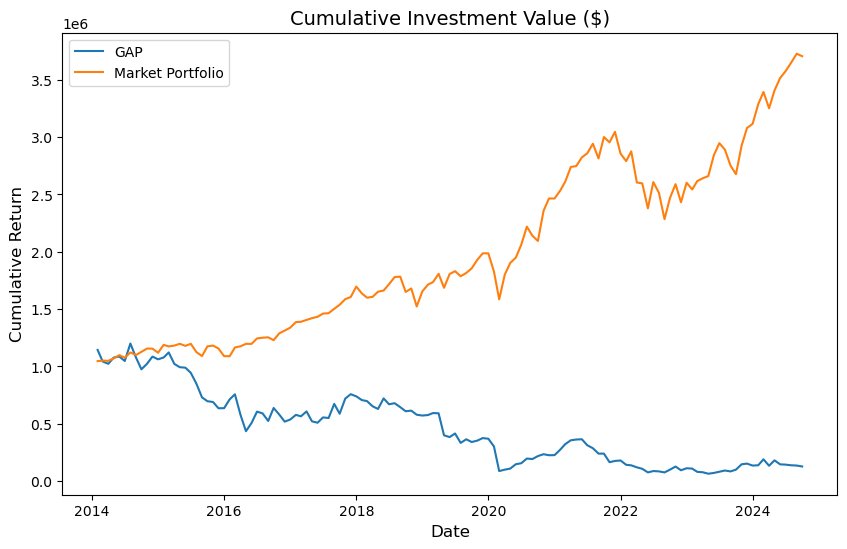

In [45]:
#it is a cell to build two portfolios that including market portfolio and and GAP only, respectively. You can clearly compare the performance of these two stocks.
# Buy and hold is not the only strategy to help you receive profit. Short-selling or buy a put option can also help you to generate a massive profit. 

initial_investment = 1000000

r_c_market = initial_investment *(1+ (reg_factor_3["Mkt-RF"]+ reg_factor_3["RF"])/100).cumprod()
r_c_gap = initial_investment * (1+reg_factor_3["GAP"]/100).cumprod()
date = reg_factor_3["date"]

plt.figure(figsize=(10, 6))
plt.plot(date, r_c_gap, label = "GAP")
plt.plot(date, r_c_market, label = "Market Portfolio")
plt.title('Cumulative Investment Value ($)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.legend()
plt.show()

#### Then what about other stocks?
- **STOCK PITCH BASED ON THE COEFFICIENT OF FACTOR**. You may wonder which stock is better to hold between Walmart, Tesla, Coca Cola and McDonald. One of factors, which is SMB, may can reveal the answer. Based on the coefficient SMB, which are  -0.5191, 0.8965,  -0.6969, and  -0.4493 for Walmart, Tesla, Coca Cola and McDonald respectively. SMB factor reveals that small stocks (companies with small market capitalization) generate excess returns compared to large stocks (companies with large market capitalization). By ordering these four stocks, you should by Tesla first, then McDonald, Walmart and Coca Cola.  


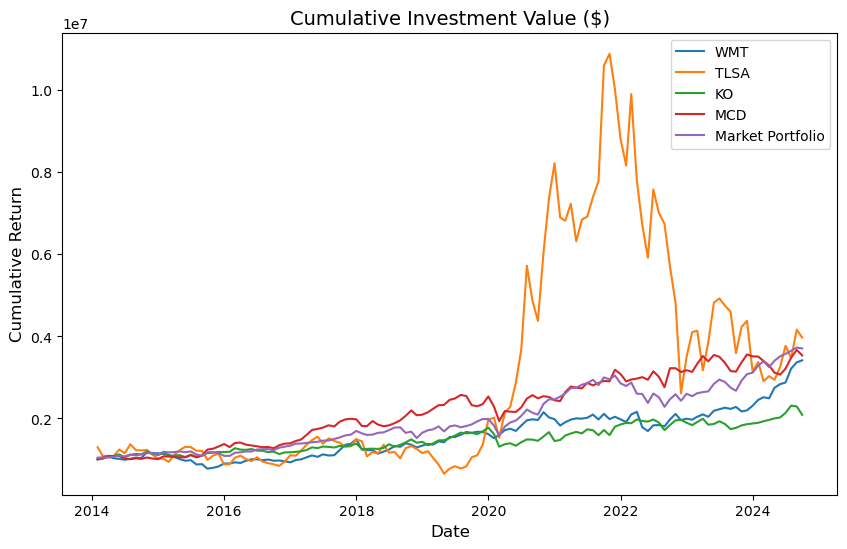

In [44]:
#it is a cell to build several portfolios that including market portfolio or targeted stock only, respectively. You can clearly compare the performance of these stocks and market portfolio.
# Buy and hold is not the only strategy to help you receive profit. Short-selling or buy a put option can also help you to generate a massive profit. 

r_c_wmt = initial_investment * (1+reg_factor_3["WMT"]/100).cumprod()
r_c_tsla = initial_investment * (1+reg_factor_3["TSLA"]/100).cumprod()
r_c_ko = initial_investment * (1+reg_factor_3["KO"]/100).cumprod()
r_c_mcd = initial_investment * (1+reg_factor_3["MCD"]/100).cumprod()

date = reg_factor_3["date"]

plt.figure(figsize=(10, 6))
plt.plot(date, r_c_wmt, label = "WMT")
plt.plot(date, r_c_tsla, label = "TLSA")
plt.plot(date, r_c_ko, label = "KO")
plt.plot(date, r_c_mcd, label = "MCD")
plt.plot(date, r_c_market, label = "Market Portfolio")
plt.title('Cumulative Investment Value ($)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.legend()
plt.show()

In [ ]:
### In-class practice 2: Fama and French developed 5-factor model in 2014. Now pick 4 stocks you prefer, clean the data and rerun the regression. 
### Discuss your results and seek any potential trading strategy and interpret your stock pitch.
### For the entire process, you need to fill out the rest of cells based on my requirements.

In [ ]:
#step 1: load the monthly close price data based your your selection. Convert your closing price to a monthly return. 
#Note: You should consider stocks with at least 8 years historical price. Fama and French's factor models works better by the assumption about holding a security with a relatively long time. 








In [ ]:
#step 2: load the 5-factor dataset and clean. Based on the dataset you retrieved from step 1, what part of data do you need to delete?









In [ ]:
#step 3: combine the two datasets you generated from step 1 and step 2 together. 
#note: The number in the 5-factor dataset is presented as percentage, for example, 0.5 means 0.5%. The return dataset you retrieved in step 1 is calculated as decimal. 
#For your further calculation, you need to make your data consistence, either both percentage or both decimals. 
#To merge two data properly, you need to make sure both of these two datasets have same index.










In [ ]:
#step 4: calculate excess returns for each stock and identify several dependent variables and independent variables, respectively.
#note: you need to add constant before running regression.









In [ ]:
#step 5: run different regression based on 5-factor model. Discuss your finding. 
# Cell for stock 1












In [ ]:
#step 5: run different regression based on 5-factor model. Discuss your finding. 
# Cell for stock 2













In [ ]:
#step 5: run different regression based on 5-factor model. Discuss your finding. 
# Cell for stock 3
















In [ ]:
#step 5: run different regression based on 5-factor model. Discuss your finding. 
# Cell for stock 4













